In [1]:
import math 
#Модуль math – один из наиважнейших. 
#Этот модуль предоставляет обширный функционал для работы с числами
from tkinter import *

In [3]:
import matplotlib.pyplot as plt
from skimage.draw import *

In [4]:
#В данном случае эта запись означает, 
#что мы импортируем модуль math из Tkinter 
#Tkinter - кроссплатформенная библиотека 
#для разработки графического интерфейса на языке Python
x=750 #это параметры расположения дерева
y=750
side=100 #сторона квадрата
deep=6 #количество итераций
alfa=math.pi/3

In [70]:
# объявляем функцию для построения дерева, 
# которая принимает на вход заданные выше параметры
def Pyth_tree(img, x, y, side, fi, alfa, deep, count_deep):
    if side < 1:
        return
    #эта функция рекурсивно рисует дерево Пифагора
    dx=side*math.sin(fi)
    dy=side*math.cos(fi)
    
    x1=x+dx
    y1=y-dy
    
    x2=x+dx-dy
    y2=y-dy-dx
    
    x3=x-dy
    y3=y-dx
    
    x4=x-dy+side*math.cos(alfa)*math.sin(fi-alfa)
    y4=y-dx-side*math.cos(alfa)*math.cos(fi-alfa)
    
    rr, ff = polygon_perimeter([x, x1, x2, x3],[y, y1, y2, y3])
    img[rr,ff] = 1
    #canv.create_polygon(x3, y3, x2, y2, x4, y4, fill=colour)
     
    if deep>1:
        Pyth_tree(img, x4, y4, side*math.sin(alfa), fi-alfa+math.pi/2, alfa, deep-1,count_deep+1)
        Pyth_tree(img, x3, y3, side*math.cos(alfa), fi-alfa, alfa, deep-1,count_deep+1)

In [71]:
import numpy as np

In [76]:
img = np.zeros((1000,1000))

In [77]:
Pyth_tree(img, x-100,y-100, side, 0, math.radians(45), 6,6)

In [78]:
%matplotlib inline

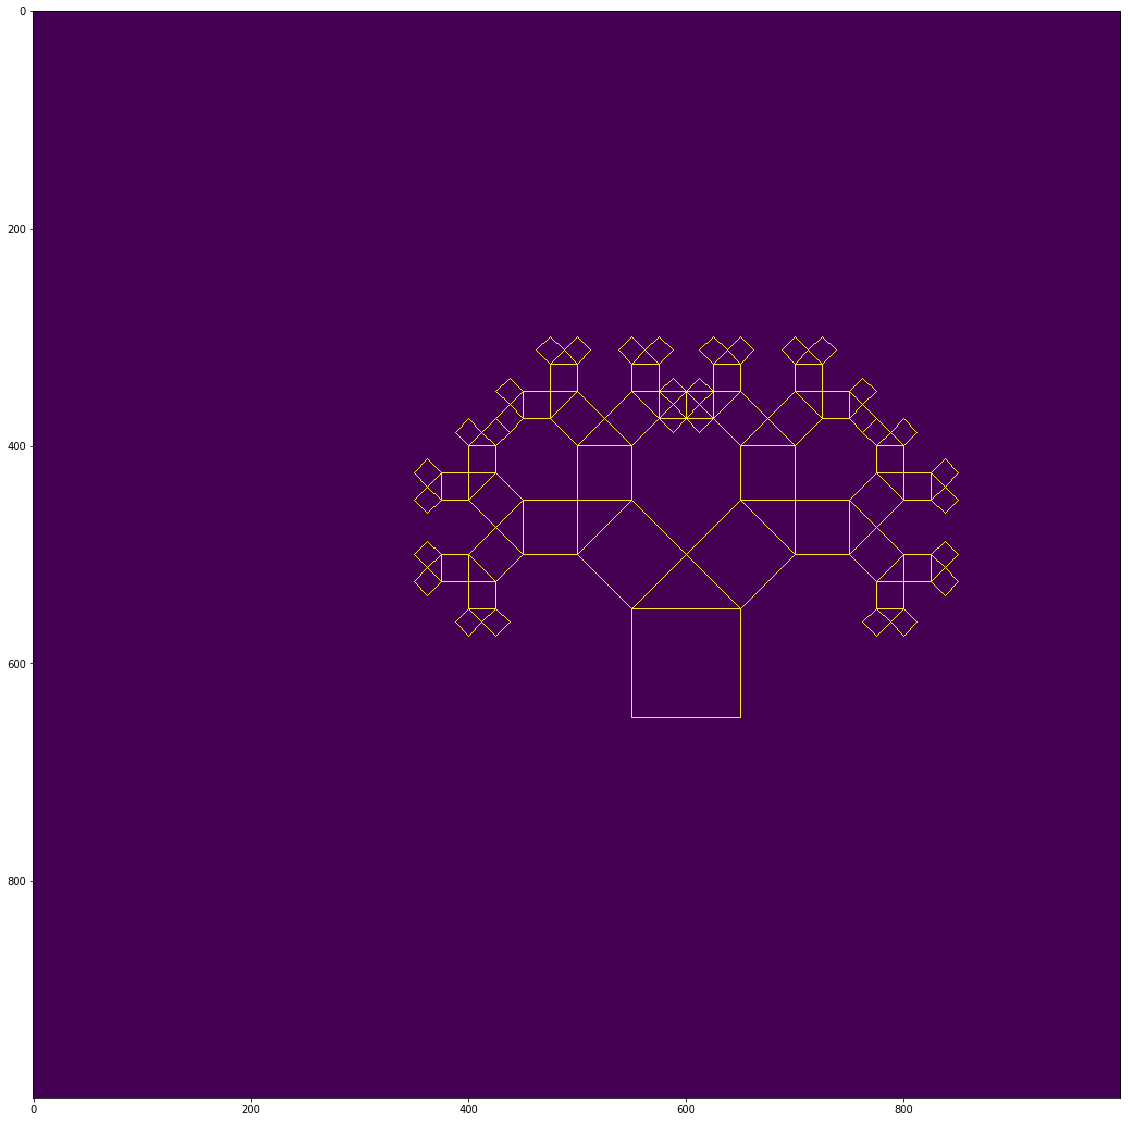

In [79]:
plt.figure(figsize=(20,20))
plt.imshow(img)